**ASSIGNMENT-3 : BUILD CNN MODEL FOR  CLASSIFICATION OF FLOWERS**

In [1]:
#Creating model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [3]:
#Image Augmentation
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import scipy

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [6]:
import pathlib
data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [7]:
data_dir = tf.keras.utils.get_file('flower_photos', origin=data_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 4s 0us/step


In [8]:
batch_size = 32
img_height = 180
img_width  = 180

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size =(img_height,img_width),
    batch_size = batch_size,
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [10]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size =(img_height,img_width),
    batch_size = batch_size,
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
class_name = train_ds.class_names
print(class_name)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [12]:
#Adding layers
model=Sequential()

In [13]:
#Input Layers (Convolution ,Maxpooling,Flatten)
from tensorflow.keras import layers
normalization_layer = layers.Rescaling(1./255)

In [14]:
num_classes = len(class_name)
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(64, 3 ,padding='same' , activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 518400)            0         
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [17]:
model.add(Dense(5,activation='softmax'))
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
len(train_ds)

92

In [18]:
#Training model
model.fit_generator(train_ds,steps_per_epoch=len(train_ds), validation_data=test_ds, validation_steps=len(test_ds), epochs= 10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 165s 2s/step - loss: 4.0705 - accuracy: 0.4097 - val_loss: 1.1320 - val_accuracy: 0.5490
Epoch 2/10
92/92 [==============================] - 165s 2s/step - loss: 0.9001 - accuracy: 0.6574 - val_loss: 1.0043 - val_accuracy: 0.6199
Epoch 3/10
92/92 [==============================] - 162s 2s/step - loss: 0.4183 - accuracy: 0.8634 - val_loss: 1.0890 - val_accuracy: 0.6090
Epoch 4/10
92/92 [==============================] - 164s 2s/step - loss: 0.1803 - accuracy: 0.9475 - val_loss: 1.4412 - val_accuracy: 0.6035
Epoch 5/10
92/92 [==============================] - 164s 2s/step - loss: 0.0655 - accuracy: 0.9837 - val_loss: 1.8028 - val_accuracy: 0.5736
Epoch 6/10
92/92 [==============================] - 163s 2s/step - loss: 0.0686 - accuracy: 0.9837 - val_loss: 1.6163 - val_accuracy: 0.5817
Epoch 7/10
92/92 [==============================] - 162s 2s/step - loss: 0.0382 - accuracy: 0.9911 - val_loss: 1.9381 - val_accuracy: 0.5995
Epoch 8/10
92/92 [======

In [19]:
#Save the model
model.save('Flowers_classification_model_1.h5')
#Test the  model
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('Flowers_classification_model_1.h5')
flower_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg'
flower_path = tf.keras.utils.get_file('Red_flower', origin=flower_url )

117948/117948 [==============================] - 0s 0us/step


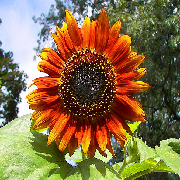

In [20]:
img = tf.keras.utils.load_img(flower_path,target_size=(img_height, img_width),)
img

In [21]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
# x_train.class_indices
index=['daisy','dandelion','rose','sunflower','tulip']
index[y[0]]

1/1 [==============================] - 0s 246ms/step


'sunflower'